In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 1 - Read the data file into a dataframe

##### Data source - https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [2]:
dftotal = pd.read_csv('D:/Py/Notebooks/Bank Deposit Classification/mybank.csv',delimiter=';')

In [3]:
dftotal.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
dftotal.shape

(41188, 21)

In [5]:
dftotal['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

##### To keep analysis speedy, we drop nonexistent outcome rows and treat our masterdata as having only failure and success of previous outcome

In [6]:
dftotal = dftotal[dftotal['poutcome']!='nonexistent']

In [7]:
dftotal.shape

(5625, 21)

### Step 2 - Split the masterdata now into a training file and a not-to-be-touched test data file

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = dftotal.drop(columns=['y'])
Y = dftotal['y']

In [10]:
df,xtest,dfy,ytest = train_test_split(X,Y,train_size=0.8)

In [11]:
df.shape, dfy.shape, xtest.shape, ytest.shape

((4500, 20), (4500,), (1125, 20), (1125,))

In [12]:
#create the full training dataframe df

df['y'] = dfy
df.head()

C:\Users\vshar\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
39910,36,admin.,single,university.degree,no,yes,no,cellular,jun,wed,...,1,999,1,failure,-1.7,94.055,-39.8,0.739,4991.6,no
29431,46,entrepreneur,single,university.degree,no,yes,yes,cellular,apr,mon,...,12,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no
24294,50,technician,married,high.school,no,no,no,cellular,nov,mon,...,1,999,1,failure,-0.1,93.200,-42.0,4.191,5195.8,no
29471,35,technician,married,university.degree,no,yes,no,cellular,apr,mon,...,3,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no
35363,23,blue-collar,single,professional.course,no,yes,no,cellular,may,fri,...,3,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1,no


In [13]:
# write the test data x values and target values into csv files

xtest.to_csv('D:/Py/Notebooks/Bank Deposit Classification/banktest_X.csv',index=None)
ytest.to_csv('D:/Py/Notebooks/Bank Deposit Classification/banktest_Y.csv',index=None)

##### At this point, we now have a dataframe df which is to be used for training the models and separate test data saved in csv files

### Step 3 - Explore and clean the training data

In [14]:
df.shape

(4500, 21)

In [15]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [16]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [17]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [18]:
#check number of unique values for each columns

colnames = list(df.columns)

for i in range(0,df.shape[1]):
    num = df[colnames[i]].unique().size
    name = colnames[i]
    print(name, num)

age 74
job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
duration 848
campaign 15
pdays 27
previous 7
poutcome 2
emp.var.rate 8
cons.price.idx 22
cons.conf.idx 22
euribor3m 235
nr.employed 9
y 2


###### Preprocessing step - drop columns

In [19]:
# lets think of what variables can be dropped

# 1. Drop duration since data description says its highly predictive of y and wont make for a realistic model
# 2. Dropping month and day of week also - just my own opinion
# 3. Dropping some campaign attributes due to conflicting info - pdays, previous

df2 = df.drop(columns=['duration','month','day_of_week','pdays','previous'])

##### Preprocessing step - convert categorical features into dummies

In [20]:
# get features in X and target in Y

X = df2.drop(columns=['y'])
Y = df2['y']

In [21]:
dumlist = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'poutcome']

In [22]:
X = pd.get_dummies(X,columns=dumlist,prefix=dumlist,drop_first=True)

In [23]:
X.columns

Index(['age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'poutcome_success'],
      dtype='object')

##### Preprocessing step - standardize the variables (including the binary coded variables - though there are 2 schools of thought on this)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
myscaler = StandardScaler()

In [26]:
myscaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
X_scaled = myscaler.transform(X)

### Step 4 - Model different Classifiers

In [28]:
from sklearn.model_selection import GridSearchCV
import time

##### Model 1 - KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
num = int(np.sqrt(X.shape[0]))
num

67

In [30]:
paramgrid = {'n_neighbors':np.arange(1,71)}

In [31]:
clfKNN = GridSearchCV(KNeighborsClassifier(),paramgrid,cv=10)

In [32]:
start = time.time()
clfKNN.fit(X_scaled,Y)
end = time.time()
print('Time taken to fit the gridsearch = ',round((end-start),2),'seconds')

Time taken to fit the gridsearch =  252.17 seconds


In [33]:
clfKNN.best_params_

{'n_neighbors': 27}

In [34]:
clfKNN.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='uniform')

In [35]:
score_KNN = clfKNN.best_score_
print(score_KNN)

0.8008888888888889


In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
myKNN = KNeighborsClassifier()

In [38]:
score2 = cross_val_score(myKNN,X_scaled,Y,cv=10)

In [39]:
score2.mean()

0.7897777777777777

In [40]:
ImprovKNN = (clfKNN.best_score_ - score2.mean())/score2.mean()*100

In [41]:
print('Hypertuning resulted in improvement of: ',round(ImprovKNN,2),'%')

Hypertuning resulted in improvement of:  1.41 %


##### Model 2 - Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
paramgridtree = {'criterion':['gini','entropy'],'max_features':['sqrt','log2',None]}

In [44]:
clftree = GridSearchCV(DecisionTreeClassifier(),paramgridtree,cv=10)

In [45]:
start = time.time()
clftree.fit(X_scaled,Y)
end = time.time()
print('Time taken to fit the gridsearch = ',round((end-start),2),'seconds')

Time taken to fit the gridsearch =  2.19 seconds


In [46]:
clftree.best_params_

{'criterion': 'entropy', 'max_features': None}

In [47]:
clftree.best_score_

0.766888888888889

In [48]:
mytree = DecisionTreeClassifier()

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
score2 = cross_val_score(mytree,X_scaled,Y,cv=10)

In [51]:
score2.mean()

0.756

In [52]:
ImprovTree = (clftree.best_score_ - score2.mean())/score2.mean()*100

In [53]:
print('Hypertuning resulted in improvement of: ',round(ImprovTree,2),'%')

Hypertuning resulted in improvement of:  1.44 %


##### Model 3 - Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
myreg = LogisticRegression()

In [56]:
myreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [57]:
paramgridlog = {'C':[0.1,1,2,3,3.5,3.6,4,5,6],'solver':['newton-cg', 'lbfgs', 'liblinear']}

In [58]:
clfLog = GridSearchCV(LogisticRegression(),paramgridlog,cv=10)

In [59]:
start = time.time()
clfLog.fit(X_scaled,Y)
end = time.time()
print('Time taken to fit the gridsearch = ',round((end-start),2),'seconds')

Time taken to fit the gridsearch =  31.71 seconds


In [60]:
clfLog.best_params_

{'C': 3, 'solver': 'liblinear'}

In [61]:
clfLog.best_score_

0.823111111111111

In [62]:
mylog = LogisticRegression()

In [63]:
score2 = cross_val_score(mylog,X_scaled,Y,cv=10)

In [64]:
score2.mean()

0.8226666666666664

In [65]:
ImprovLog = (clfLog.best_score_ - score2.mean())/score2.mean()*100

In [66]:
print('Hypertuning resulted in improvement of: ',round(ImprovLog,2),'%')

Hypertuning resulted in improvement of:  0.05 %


##### Model 4 - Support Vector

In [67]:
from sklearn.svm import SVC

In [68]:
mysvc = SVC()

In [69]:
mysvc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [70]:
paramgridsvm = {'C':[0.1,0.5,0.55,0.6,0.7],'kernel':['linear', 'rbf', 'sigmoid']}

In [71]:
clfSVM = GridSearchCV(SVC(),paramgridsvm,cv=10)

In [72]:
start = time.time()
clfSVM.fit(X_scaled,Y)
end = time.time()
print('Time taken to fit the gridsearch = ',round((end-start),2),'seconds')

Time taken to fit the gridsearch =  143.98 seconds


In [73]:
clfSVM.best_params_

{'C': 0.5, 'kernel': 'rbf'}

In [74]:
clfSVM.best_score_

0.8182222222222222

### Step 5 - Identify best model and save it for future use

#### Aggregate scores for all classifiers

In [75]:
scores = [clfKNN.best_score_,clftree.best_score_,clfLog.best_score_,clfSVM.best_score_]
classifiers = ['KNN','DecisionTree','LogisticReg','SVM']

In [76]:
scoresdf = pd.DataFrame()
scoresdf['classifier'] = classifiers
scoresdf['score'] = scores

scoresdf

,classifier,score
0,KNN,0.800889
1,DecisionTree,0.766889
2,LogisticReg,0.823111
3,SVM,0.818222


In [77]:
scoresdf = scoresdf.set_index('classifier')

In [78]:
scoresdf = scoresdf.sort_values(by='score',ascending=False)

In [79]:
scoresdf

,score
classifier,
LogisticReg,0.823111
SVM,0.818222
KNN,0.800889
DecisionTree,0.766889


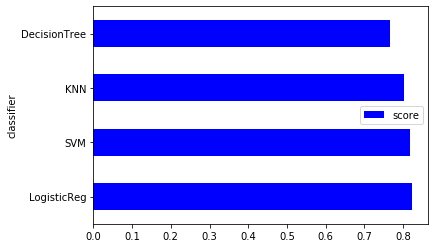

In [80]:
scoresdf.plot(kind='barh',color='b')

#### Identify the best model

In [81]:
#Logistic Regression seems to give the best model in terms of accuracy as shown above

model = clfLog.best_estimator_
model

LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

#### Save the best model in a pkl file on disk for future deployment

In [82]:
import pickle

In [83]:
filename = 'D:/Py/Notebooks/Bank Deposit Classification/bankdeposit_model.pkl'
pickle.dump(model, open(filename, 'wb'))